In [0]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import np_utils

In [37]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
root = r'/content/gdrive/My Drive/'

In [15]:
df = pd.concat([pickle.load(open(root+"df1.pickle", "rb")),pickle.load(open(root+"df2.pickle", "rb"))])

OSError: ignored

In [16]:
print(df.shape)

print(df.level.value_counts())
df.describe()

(88702, 3)
0    65343
2    13153
1     6205
3     2087
4     1914
Name: level, dtype: int64


,level
count,88702.000000
mean,0.523415
std,0.972693
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,4.000000


0

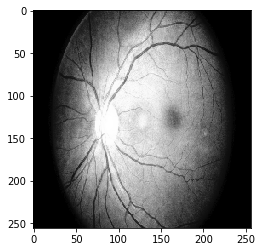

In [17]:
plt.imshow(df.eq_img[141], cmap='gray')
df.level[141]

In [18]:
zerodf=df[df['level']==0][:1910]
onedf = df[df['level']==1][:1910]
twodf = df[df['level']==2][:1910]
threedf = df[df['level']==3][:1910]
fourdf = df[df['level']==4][:1910]
neww=pd.DataFrame()
neww=neww.append(zerodf).append(onedf).append(twodf).append(threedf).append(fourdf)
neww.shape

(9550, 3)

In [19]:
print (neww.level.value_counts())
neww.describe()

4    1910
3    1910
2    1910
1    1910
0    1910
Name: level, dtype: int64


,level
count,9550.000000
mean,2.000000
std,1.414288
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [0]:
df = 0;
zerodf = 0
onedf = 0
twodf = 0
threedf = 0
fourdf = 0

In [0]:
images = neww.eq_img
labels = neww.level
img = []

for row in images:
    img.append(np.array(row).flatten())

In [0]:
images = 0
neww = 0

In [0]:
img = np.array(img)

In [0]:
img.shape

img_rows = 256
img_cols = 256

In [25]:
(X, y) = (img, labels)

#Splitting the data into Train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)
# X_train = img[:14000]
# X_test = img[14000:]
# y_train = labels[:14000]
# y_test = labels[14000:]

print(X_train.shape)
print(X_test.shape)

img = 0
labels = 0

#Reshaping the flattened numpy array into a image matrix 
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(8595, 65536)
(955, 65536)
X_train shape: (8595, 256, 256, 1)
8595 train samples
955 test samples


In [26]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 5)
Y_test = np_utils.to_categorical(y_test, 5)

Y_train[0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [0]:
from keras.models import Sequential
import keras
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import LeakyReLU, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator

# import optimizer


#batch_size to train
batch_size = 64
# number of output classes
nb_classes = 5
# number of epochs to train
nb_epoch = 5
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [0]:
# create generators  - training data will be augmented images
validationdatagenerator = ImageDataGenerator()
traindatagenerator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

batchsize=8
train_generator=traindatagenerator.flow(X_train, Y_train, batch_size=batchsize) 
validation_generator=validationdatagenerator.flow(X_test, Y_test,batch_size=batchsize)

In [29]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', input_shape=(img_cols, img_rows,1), activity_regularizer=keras.regularizers.l2(0.001), strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid', strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))




model.add(Conv2D(128,kernel_size=(3,3),padding='valid', strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(rate=0.1))         #add dropout to prettify this big-ass cnn



model.add(Conv2D(256,kernel_size=(3,3),padding='valid', strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(rate=0.1))         #add dropout to prettify this big-ass cnn
model.add(Conv2D(256,kernel_size=(3,3),padding='valid', strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(rate=0.1))


model.add(Conv2D(512,kernel_size=(3,3),padding='valid', strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(rate=0.1))         #add dropout to prettify this big-ass cnn
model.add(Conv2D(512,kernel_size=(3,3),padding='valid', strides=(2,2)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.4))         #add dropout to prettify this big-ass cnn

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU(0.01))
model.add(Dropout(rate=0.4))


model.add(Dense(1024))
model.add(LeakyReLU(0.01))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

manual_optimizer=keras.optimizers.Adadelta(lr=2.0, rho=0.95, epsilon=None, decay=0)
model.compile(loss='categorical_crossentropy', optimizer=manual_optimizer, metrics=['accuracy'])












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
from keras.callbacks import History
history = History()


In [0]:
# history = model.fit_generator(train_generator, steps_per_epoch=int(len(X_train)/8), epochs=10, validation_data=validation_generator,verbose=True, validation_steps=int(len(X_test)/8))
history = model.fit(X_, steps_per_epoch=int(len(X_train)/8), epochs=10, validation_data=validation_generator,verbose=True, validation_steps=int(len(X_test)/8))

Epoch 1/10
1074/1074 [==============================] - 83s 77ms/step - loss: 1.9534 - acc: 0.2132 - val_loss: 1.8391 - val_acc: 0.2492
Epoch 2/10
1074/1074 [==============================] - 81s 75ms/step - loss: 1.8216 - acc: 0.2243 - val_loss: 2.1217 - val_acc: 0.2186
Epoch 3/10
1074/1074 [==============================] - 81s 75ms/step - loss: 1.7947 - acc: 0.2540 - val_loss: 1.8405 - val_acc: 0.2429
Epoch 4/10
1074/1074 [==============================] - 83s 77ms/step - loss: 1.7637 - acc: 0.2546 - val_loss: 1.6774 - val_acc: 0.2851
Epoch 5/10
1074/1074 [==============================] - 84s 78ms/step - loss: 1.7585 - acc: 0.2715 - val_loss: 1.6639 - val_acc: 0.2756
Epoch 6/10
1074/1074 [==============================] - 85s 80ms/step - loss: 1.7200 - acc: 0.2872 - val_loss: 1.7168 - val_acc: 0.2397
Epoch 7/10
1074/1074 [==============================] - 85s 79ms/step - loss: 1.6975 - acc: 0.2942 - val_loss: 1.7803 - val_acc: 0.2270
Epoch 8/10
1074/1074 [==========================

In [0]:
model.save('cnn_model.hdf5')

In [36]:
from keras.models import load_model

godmodel = load_model(root+'')

OSError: ignored

In [0]:
# #Keras CNN Architecture   old

# model = Sequential()

# model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
#                         padding='valid',
#                         input_shape=(img_cols, img_rows, 1)))

# convout1 = Activation('relu')
# model.add(convout1)

# model.add(Convolution2D(nb_filters+32, nb_conv, nb_conv))
# convout2 = Activation('relu')
# model.add(convout2)
# model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

# model.add(Convolution2D(nb_filters+32, nb_conv, nb_conv))
# convout3 = Activation('relu')
# model.add(convout3)
# model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
# model.add(Dropout(0.5))

# model.add(Flatten())
# model.add(Dense(257))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(nb_classes))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


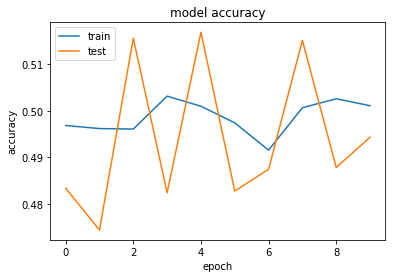

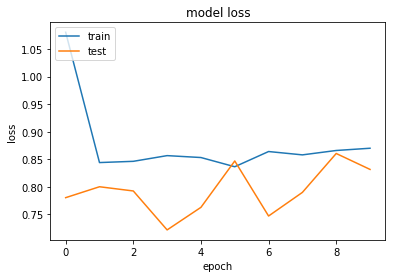

In [0]:

def plot_model_history(history):
    """
    Function to plot training and validation data of model
    
    Parameters
    ----------
    history: dictionary
             history of training and validation of model
    Returns
    -------
    None
    
    """
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
plot_model_history(history)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[1.2444444521793934, 0.4942056976730037]


In [0]:
from keras.utils import plot_model
img = plot_model(model, to_file='/content/gdrive/My Drive/model.png')
print (img)

None


In [0]:
i = np.expand_dims(X_test[4], axis=0)
print(model.predict(i))
Y_test[4]

[[0.51322466 0.4895771 ]]


array([1., 0.], dtype=float32)

In [0]:
Y_test[0][0]

0.0

In [0]:
countPX = 0
countX = 0
for i in range(2000):
  ans = model.predict(np.expand_dims(X_test[i], axis=0))
  if ans.argmax() == 1:
    countPX +=1


In [0]:
for i in range(2000):
  if Y_test[i][1] == 1:
    countX+=1

In [0]:
print(countX, countPX)

1040 270


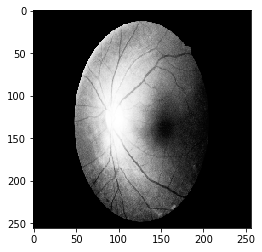

In [0]:
plt.imshow(X_test[0].reshape(256,256), cmap='gray')

In [0]:
X_test[0].shape

(256, 256, 1)

In [0]:
x = []
for i in range(1000):
  ans = model.predict(np.expand_dims(X_test[i], axis=0))
  print(ans)
  x.append(ans.argmax())  

In [0]:
x = np.array(x)
np.unique(x)

array([0, 1, 2, 3])

In [0]:
newdf = pd.DataFrame()
type(newdf)

pandas.core.frame.DataFrame

In [0]:

for index, value in df.iterrows():
    newdf.append(df['level']>0)

In [0]:
df.columns

Index(['image', 'level', 'eq_img'], dtype='object')

In [0]:
newdf

,image,level,eq_img


In [0]:
newdf=df[df['level']>0]

In [0]:
newdf.shape

(3898, 3)

In [0]:
zerodf=df[df['level']==0][:802]

In [0]:
newdf = newdf.append(zerodf)

In [0]:
newdf.shape

(4700, 3)

In [0]:
newdf.loc[0]

image                                               000001a
level                                                     0
eq_img    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: 0, dtype: object

In [0]:
neww.shape


(1650, 3)